<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

Dimensionality reduction is a machine learning (ML) or statistical technique of reducing the amount of random variables in a problem by obtaining a set of principal variables.

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [1]:
import numpy as np      
import pandas as pd     
import seaborn as sns
import matplotlib.pyplot as plt  

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset= pd.read_csv("/content/drive/MyDrive/MLE/MLE Week 8/data/past.csv.gz")

In [4]:
dataset.head()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.00,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.25,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.00,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.25,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.25,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0


In [5]:
dataset.shape

(5000, 37)

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [6]:
dataset['Purchased?'].mean()

0.3438

**Answer:** Here we see that, there is only 1/3rd dataframe for the purchased. So, this isn't a balanced dataset from the perspective of classification. Also, 34% of the rows resulted in purcahse.




In [7]:
dataset.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

In [8]:
df= dataset

In [9]:
df['interactionTime'].corr(df['Purchased?'])

0.07371676889535302

(0.0, 1.237640142574933)

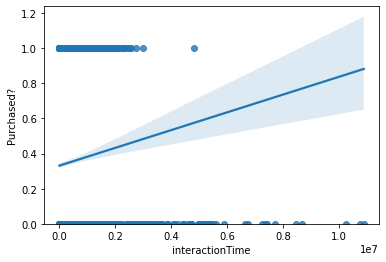

In [10]:
sns.regplot(x="interactionTime",y="Purchased?",data=df)
plt.ylim(0,)

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [11]:
new_df =df.drop(columns=['product_id','user_id'])
x= new_df.drop(columns=['Purchased?'])
y=new_df['Purchased?']

In [12]:
df.shape

(5000, 37)

In [13]:
new_df.shape

(5000, 35)

In [14]:
x.shape

(5000, 34)

In [15]:
assert x.shape == (5000, 34)
assert y.shape == (5000,)

In [16]:
X =x

:4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

**Principle Cmponent Analysis:** Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [17]:
scaler = StandardScaler()
pca = PCA(n_components=5)
scaler.fit(X)
X_scaled = scaler.transform(X)
pca.fit(X_scaled)
X_reduced = pca.transform(X_scaled)
X_reduced

array([[ 0.56747589, -1.6843789 ,  1.08714615, -0.00374767,  0.81075284],
       [ 0.4475609 ,  0.01335636, -0.57038836, -0.17766425,  0.68048142],
       [-0.15842849, -1.14732741, -0.51483019, -0.40882342, -1.00326596],
       ...,
       [ 2.13087062, -2.35771615, -1.01124333, -1.07292653,  1.47283234],
       [ 2.46149122, -1.94818369, -0.94531901,  0.06959299,  1.82751354],
       [-2.42621434,  0.35326354,  0.01466567, -0.01179933,  0.71782239]])

In [18]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [19]:
print(f'{pca.explained_variance_ratio_*100} %')


[10.28192721  9.44568278  6.50982966  5.10698613  4.27829718] %


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [20]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [21]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

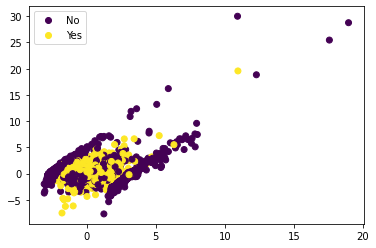

In [22]:
visualize_2pcs(X_reduced,y)

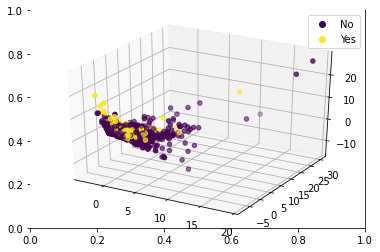

In [23]:
visualize_3pcs(X_reduced,y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [24]:
# YOUR CODE HERE (imports!)

def train(X, y, standardize = True) -> None:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
  pipeline = [StandardScaler(), LogisticRegression()]
  pipeline = make_pipeline(*pipeline[0 if standardize else 1:])
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  print(classification_report(y_test, y_pred))

**I need to look more into this code above.**   🤔

Now apply the pipeline on the all the features `X` and review the performance

In [25]:
train(x,y)

              precision    recall  f1-score   support

           0       0.66      0.93      0.78       659
           1       0.41      0.09      0.15       341

    accuracy                           0.65      1000
   macro avg       0.54      0.51      0.46      1000
weighted avg       0.58      0.65      0.56      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [26]:
train(X_reduced, y, standardize=False)

              precision    recall  f1-score   support

           0       0.65      0.97      0.78       659
           1       0.12      0.01      0.02       341

    accuracy                           0.64      1000
   macro avg       0.39      0.49      0.40      1000
weighted avg       0.47      0.64      0.52      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    **

**Answer:** The results seem good. PCA is said to reduce the number of features by constructing a new, smaller number variables which capture a signficant portion of the information found in the original features. That might be the reason for good results. 

As discussed, cons of using reduced set of features is increased risk of Overfitting.

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [27]:
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [28]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmean = KMeans(n_clusters=k, random_state=10)
        kmean.fit(X)
        inertias.append(kmean.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')


3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

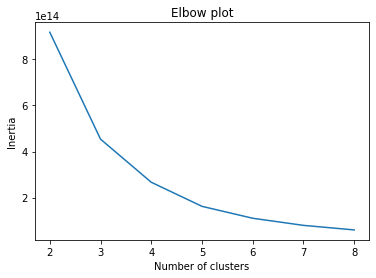

In [29]:
visualize_elbow(X,range(2,9))

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
model = KMeans(5, random_state=42)

<bound method Visualizer.show of SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7facc4c7a2e0>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=42))>

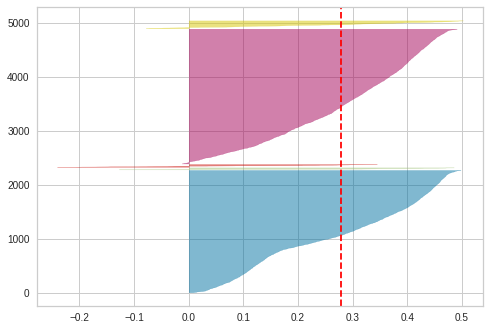

In [31]:
visualizer = SilhouetteVisualizer(model, colors=('yellowbrick'))
visualizer.fit(X_reduced)
visualizer.show

4. What are the disadvantage to use the Elbow method? 

**Answer:** What I found on researching is the disadvantage of elbow and average silhouette methods is that, they measure a global clustering characteristic only. A more sophisticated method is to use the gap statistic which provides a statistical procedure to formalize the elbow/silhouette heuristic in order to estimate the optimal number of clusters

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

🤔**I NEED TO GO THROUGH THIS AGAIN.**

In [32]:
# from utils import visualize_silhouette

<bound method Visualizer.show of SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7facc4be9910>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=7, random_state=42))>

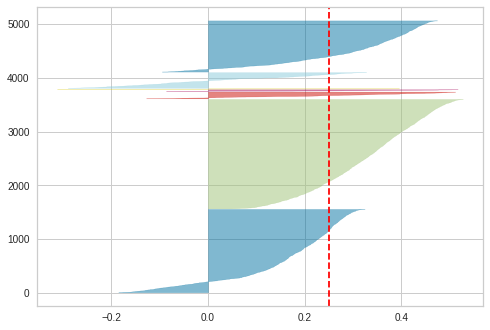

In [33]:
for x in range(2,8):
  model = KMeans(x, random_state=42)
visualizer = SilhouetteVisualizer(model, colors=('yellowbrick'))
visualizer.fit(X_reduced)
visualizer.show

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [34]:
km = KMeans(n_clusters=5, random_state=10)
km.fit(X_reduced)
print(km)

KMeans(n_clusters=5, random_state=10)


7. What is the size of each cluster? 

.inertia ----> Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

In [35]:
km.inertia_

31648.15444632405

8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [36]:
df['cluster_pca'] = [min(range(5), key=lambda i, values=values: values[i]) for values in km.transform(X_reduced)]
df['cluster_pca'].value_counts()


1    3325
3    1447
2     142
0      48
4      38
Name: cluster_pca, dtype: int64

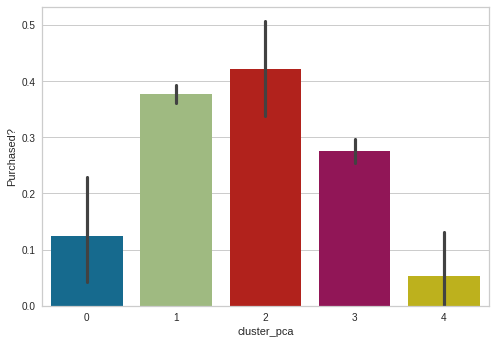

In [37]:
sns.barplot(data=df, x='cluster_pca', y='Purchased?')


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

**Answer:** Looks like all clusters have negative purchased likelihood. I think ideally we create clusters, some of which have very high likelihood of purchase, so we know how to upsell.



10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

 **Answer :**  k-means assume the variance of the distribution of each attribute (variable) is spherical; all variables have the same variance; the prior probability for all k clusters are the same, i.e. each cluster has roughly equal number of observations; If any one of these 3 assumptions is violated, then k-means will fail.

 My cluster size is 5. We ended up with data that represented the distribution. Not many clusters have a higher percentage of purchased than the base data.

In [38]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation(random_state=5).fit(X_reduced)

#In statistics and data mining, affinity propagation (AP) is a 
#clustering algorithm based on the concept of "message passing" between 
#data points.[1] Unlike clustering algorithms such as k-means or k-medoids,
# affinity propagation does not require the number of clusters to be determined 
#or estimated before running the algorithm. Similar to k-medoids, affinity propagation finds
# "exemplars," members of the input set that are representative of clusters.[1]

In [39]:
df['cluster_ap_pca'] = ap.predict(X_reduced)
df.groupby('Purchased?')['cluster_ap_pca'].value_counts()

Purchased?  cluster_ap_pca
0           72                82
            175               80
            97                66
            90                65
            117               65
                              ..
1           152                1
            155                1
            175                1
            182                1
            191                1
Name: cluster_ap_pca, Length: 320, dtype: int64

In [40]:
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score


In [41]:
af = AffinityPropagation(preference=-50, random_state=0).fit(X_reduced)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)

print(
    "Silhouette Coefficient: %0.3f"
    %silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 79
Silhouette Coefficient: -0.849


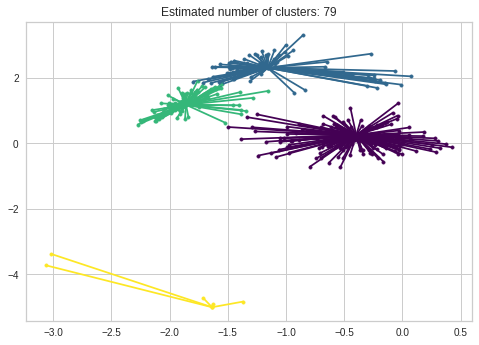

In [42]:

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_reduced[cluster_centers_indices[k]]
    plt.scatter(
        X_reduced[class_members, 0], X_reduced[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X_reduced[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

11. Jot down recommendations or followup steps, detailing the reasons.

**Answer:** Here I am using Affinity Propagation
> An algorithm that identifies exemplars among data points and forms clusters of data points around these exemplars. It operates by simultaneously considering all data point as potential exemplars and exchanging messages between data points until a good set of exemplars and clusters emerges.


The detailed steps are listed below:
1.   After importing required libraries, X_reduced is fed into the algorithm for fitting, and affinity propagation is computed. After that it is plotted and number of clusters are shown.






## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [43]:
new = pd.read_csv('/content/drive/MyDrive/MLE/MLE Week 8/data/new.csv.gz')


In [44]:
assert new.shape == (30091, 5)

In [45]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

 **Answer :**The shape of the past.csv was (5000,37) but the shape of the new.csv was (30091,5) . We see the new dataset has more rows but only 5 features.

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [46]:
# np.intersect1d(set(df['product_id'].unique()), set(new['product_id']))
len(set(df['product_id'].unique()) & set(new['product_id']))


0

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [47]:
new['Purchased?'].mean()
 # ~.344

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(new.drop(columns=['Purchased?', 'product_id']), new['Purchased?'], test_size=0.2)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()


In [49]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [50]:
pipeline = [LogisticRegression()]
pipeline = make_pipeline(*pipeline)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.65      0.96      0.78      3910
           1       0.43      0.06      0.10      2109

    accuracy                           0.64      6019
   macro avg       0.54      0.51      0.44      6019
weighted avg       0.58      0.64      0.54      6019



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [51]:
X_test = np.concatenate((X_train, X_test), axis=0)
X_train = df[[c for c in new.columns if c not in {'Purchased?', 'product_id'}]].to_numpy()

In [52]:
X = np.concatenate((X_train, X_test), axis=0)

assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [53]:
y = np.concatenate((y_train, y_test))
len(y)

30091

In [54]:
y = np.concatenate((y, pd.Series([-1] * (len(X) - len(y))).to_numpy()))

assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [55]:
from sklearn.semi_supervised import LabelSpreading
model = LabelSpreading(kernel='knn', alpha=0.01)
model.fit(X, y)


LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [56]:
semi_sup_preds = model.transduction_[len(X_train):]

In [57]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [58]:
print(classification_report(y[len(X_train):], semi_sup_preds)) # make sure you properly import classification_report


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      5000
           0       0.80      1.00      0.89     16400
           1       0.90      1.00      0.95      8691

    accuracy                           0.83     30091
   macro avg       0.57      0.67      0.61     30091
weighted avg       0.70      0.83      0.76     30091



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.65      0.96      0.78      3910
           1       0.43      0.06      0.10      2109

    accuracy                           0.64      6019
   macro avg       0.54      0.51      0.44      6019
weighted avg       0.58      0.64      0.54      6019



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

**Answer:**
The results looks fine. This maybe because of having more data and less or most important features. We can improve the algorithm by preprocessing data in better ways. Because clustering with lgorithms like knn k-means can be improved so much with better data preprocessing.

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)